From Jeff Boeing:

The Lorenz system is nonlinear, three-dimensional, and deterministic. The Lorenz attractor is a set of chaotic solutions of the Lorenz system and is possibly the most famous depiction of a system that exibits chaotic behavior. Very slight changes to the initial conditions of the system lead to wildly different solutions. The system itself describes the movement of a point in a three-dimensional space over time. The system is formally described by three ordinary differential equations that represent the movement of this point (x, y, z). In these equations, t represents time and sigma, rho, and beta are constant system parameters.

$$ \frac{dx}{dt} = \sigma (y - x) $$

$$ \frac{dy}{dt} = x (\rho - z) - y $$

$$ \frac{dz}{dt} = x y - \beta z $$

For his famous depiction of chaos, Lorenz used the values sigma = 10, beta = 8/3 and rho = 28. With these parameter values, the system exhibits deterministic chaos. It has a strange attractor with a fractal structure.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [102]:
# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t, sigma = 10., rho   = 28., beta  = 8./3.):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

def rossler_system(current_state, t, a=0.34, b=0.2, c=8.8):
    x, y, z = current_state
    dx_dt = -y - z
    dy_dt = x + a*y
    dz_dt = b + z*(x - c)
    
    return [dx_dt, dy_dt, dz_dt]

def aizawa_system(current_state, t, a = 0.95,b  = 0.7,c  = 0.6,d  = 3.5, e = 0.25, f = 0.1):
    # trying to use https://github.com/nkostin4/manim-videos/blob/master/aizawa.py
    x, y, z = current_state
#     x,y, z = x/3., y/4, z/2
#     lam_zb = 2/5
    dx_dt = (z-b)*x - d*y #x*lam_zb*(z - b) - d*y
    dy_dt = d*x + (z-b)*y #d*x + y*lam_zb*(z-b)
    dz_dt = c + a*z - (z**3/(3*d)) - (x**2 + y**2) * (1 + e * z) + f * z * (x**3) #c + a*z - (z**3/3) + e*z*x**3
    
    dx_dt = (z - b)*x - d*y,
    dy_dt = d*x + (z - b)*y
    dz_dt = c + a*z - ((z**3)/(3)) - ((x**2 + y**2)*(1 + e*z)) + f*z*(x**3)
    return [dx_dt, dy_dt, dz_dt]

In [106]:
initial_state = [1.45e+00, -1.25e-01, 8.07e-01] #[0.1, 0, 0]

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 400

time_points = np.linspace(start_time, end_time, end_time*100)
xyz = odeint(aizawa_system, np.array(initial_state), time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

ValueError: setting an array element with a sequence.

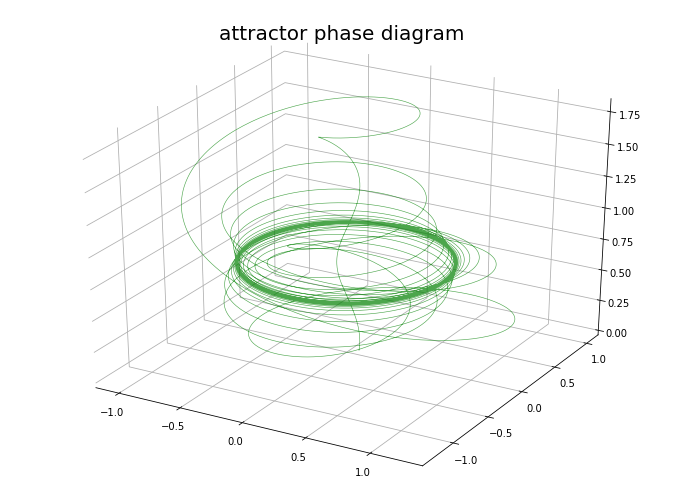

In [105]:
# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)
title_font = fm.FontProperties(family='Myriad Pro', style='normal', size=20, weight='normal', stretch='normal')
ax.set_title('attractor phase diagram', fontproperties=title_font)

#fig.savefig('{}/attractor-3d.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

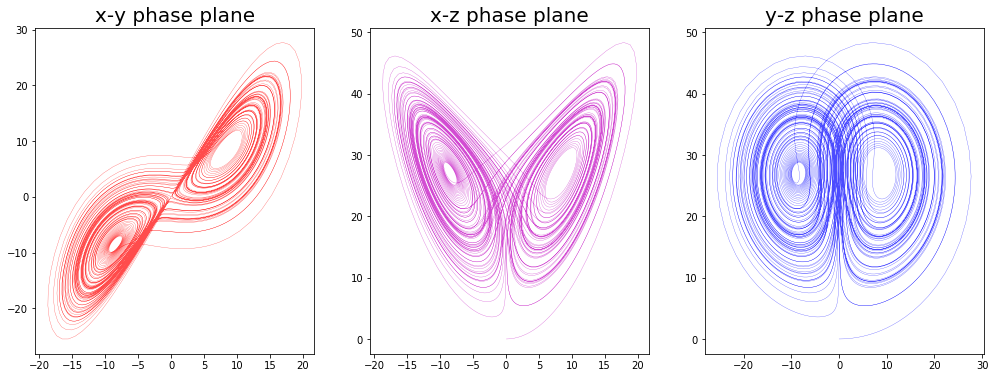

In [9]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(x, y, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane', fontproperties=title_font)

# plot the x values vs the z values
ax[1].plot(x, z, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane', fontproperties=title_font)

# plot the y values vs the z values
ax[2].plot(y, z, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane', fontproperties=title_font)

#fig.savefig('{}/lorenz-attractor-phase-plane.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()